In [86]:
#Database muy pesado, se importa en una cantidad limitada.

import pandas as pd

reader = pd.read_csv('final_animedataset.csv',chunksize=10000)

#for batch in df:

   # print(batch.head(5))

In [87]:
# Obtener el primer chunk de datos y sus columnas
df = next(reader)
columnas = df.columns


# Imprimir las variables (columnas)
for columna in columnas:
    print(columna)

username
anime_id
my_score
user_id
gender
title
type
source
score
scored_by
rank
popularity
genre


In [88]:
#Muestreo probabilístico
#1) Por CLUSTERS

from sklearn.utils import resample

In [94]:
# Crear la variable X con todas las columnas excepto 'username'
X = df.drop('username', axis=1)

# Crear la variable Y con solo la columna 'username'
y = df['username']

In [95]:
X_resampled, y_resampled = resample(X, y,
                                    replace=True,  # Permitir reemplazo en el remuestreo
                                    n_samples=1000,  # Tamaño de la nueva muestra
                                    random_state=42,  # Semilla aleatoria para reproducibilidad
                                    stratify=y)  # Remuestreo estratificado según las etiquetas


In [96]:
X_resampled, y_resampled = resample(X, y)

In [97]:
df_resampled = resample(batch, replace=True, n_samples=1000, random_state=42)

<AxesSubplot:ylabel='Frequency'>

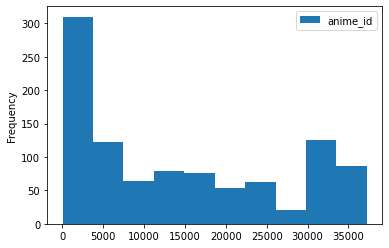

In [98]:
df_resampled.plot(kind='hist', y='anime_id')

In [48]:
#Muestreo No Probabilistico
#2)Sistematico


import numpy as np

# Crear un arreglo de valores en un rango especificado
inicio = 15000
fin = 80000
paso = 3
arreglo = np.arange(inicio, fin, paso)

arreglo = np.arange(len(batch['anime_id']))
print(arreglo)


[   0    1    2 ... 5692 5693 5694]


In [49]:
#Muestreo No Probabilistico
#3) Con PROPOSITO

df_resampled_2 = batch[batch["popularity"] < 2000]


In [50]:

#Muestreo No Probabilistico
#4) Con CUOTA

import random
cuotas = {
    'gender': {'Female': 60, 'Male': 40},
    'type': {'TV': 50, 'Movie': 30, 'OVA': 20},
    # Agrega las cuotas para las otras variables...
}


muestra_cuotas = []

# Función para verificar si se han cumplido las cuotas para todas las variables
def cumplir_cuotas(muestra_cuotas, cuotas):
    for variable, categorias in cuotas.items():
        for categoria, cuota in categorias.items():
            if sum(1 for row in muestra_cuotas if row[variable] == categoria) >= cuota:
                return True
    return False


contador_datos = 0

# Realizar el muestreo por cuota hasta alcanzar al menos 1000 datos
while contador_datos < 1000:
    for _, row in batch.iterrows():
        participante = {
            'username': row['username'],
            'anime_id': row['anime_id'],
            'my_score': row['my_score'],
            'user_id': row['user_id'],
            'gender': row['gender'],
            'title': row['title'],
            'type': row['type'],
            'source': row['source'],
            'score': row['score'],
            'scored_by': row['scored_by'],
            'rank': row['rank'],
            'popularity': row['popularity']
        }
        muestra_cuotas.append(participante)
        contador_datos += 1
        
        if cumplir_cuotas(muestra_cuotas, cuotas) and contador_datos >= 1000:
            break


df_muestra_cuotas = pd.DataFrame(muestra_cuotas)

            username  anime_id  my_score  user_id gender  \
0    ravi0li-ravi0li     22535         9  6981430   Male   
1    ravi0li-ravi0li     22789        10  6981430   Male   
2    ravi0li-ravi0li     24031         6  6981430   Male   
3    ravi0li-ravi0li     28825         8  6981430   Male   
4    ravi0li-ravi0li     31240         0  6981430   Male   
..               ...       ...       ...      ...    ...   
995         Apolinho     34280         0  4133123   Male   
996         Apolinho     34822         7  4133123   Male   
997         Apolinho     34902         0  4133123   Male   
998         Apolinho     34934         0  4133123   Male   
999         Apolinho     35507         0  4133123   Male   

                                                 title type        source  \
0                           Kiseijuu: Sei no Kakuritsu   TV         Manga   
1                                            Barakamon   TV     Web manga   
2                               Denki-gai no Hon

In [99]:
df.shape[0]

10000

In [52]:
df_muestra_cuotas.shape[0]

1000

In [53]:
df_resampled.shape[0]

1000

In [54]:
df_resampled["popularity"].mean()

2433.745

In [100]:
df["popularity"].mean()

2026.5418

In [56]:
df_muestra_cuotas["popularity"].mean()

885.498

In [102]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
import pandas as pd


df = df_complete.dropna()  # Eliminar filas con valores faltantes
columnas_clustering = ['score','rank','popularity']


n_clusters = 3
kmeans = KMeans(n_clusters=n_clusters)


kb= kmeans.fit(df_complete[columnas_clustering])

# Obtener las etiquetas de cluster asignadas a cada muestra
etiquetas_clusters_batch = kmeans.labels_

# Obtener los centroides de cada cluster
centroides_batch = kmeans.cluster_centers_

# Agregar las etiquetas de cluster y los centroides al DataFrame original
df['cluster'] = etiquetas_clusters_batch


print(centroides_batch)

[[   7.90535336  939.81821618  845.46126228]
 [   6.27846482 6041.65387349 5650.891258  ]
 [   7.00305372 3573.69871191 2313.15017279]]


In [67]:
#K-Means muestra por clusters, probabilistica

df = df_resampled.dropna()  # Eliminar filas con valores faltantes
columnas_clustering = ['score','rank','popularity']


n_clusters = 3
kmeans = KMeans(n_clusters=n_clusters)


krs =kmeans.fit(df[columnas_clustering])

# Obtener las etiquetas de cluster asignadas a cada muestra
etiquetas_clusters_rs = kmeans.labels_

# Obtener los centroides de cada cluster
centroides_rs = kmeans.cluster_centers_

# Agregar las etiquetas de cluster y los centroides al DataFrame original
df['cluster'] = etiquetas_clusters_rs


print(centroides_rs)

[[   7.85894212 1071.73852295  735.03792415]
 [   6.63320513 4908.81410256 1462.57051282]
 [   6.76226667 4438.01333333 5097.14666667]]


C:\Users\NALLEL~1\AppData\Local\Temp/ipykernel_12664/3001476080.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cluster'] = etiquetas_clusters_rs


In [68]:
#K-Means muestra por cuota, no probabilistica

df = df_muestra_cuotas.dropna()  
columnas_clustering = ['score','rank','popularity']

n_clusters = 3
kmeans = KMeans(n_clusters=n_clusters)


kc= kmeans.fit(df[columnas_clustering])

# Obtener las etiquetas de cluster asignadas a cada muestra
etiquetas_clusters_cuota = kmeans.labels_

# Obtener los centroides de cada cluster
centroides_cuota = kmeans.cluster_centers_

# Agregar las etiquetas de cluster y los centroides al DataFrame original
df['cluster'] = etiquetas_clusters_cuota


print(centroides_cuota)

[[   8.0072      741.66        367.76142857]
 [   6.35017544 5812.24561404 5892.50877193]
 [   7.03120833 3459.24583333 1170.125     ]]


C:\Users\NALLEL~1\AppData\Local\Temp/ipykernel_12664/426373284.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cluster'] = etiquetas_clusters_cuota


In [103]:
wcss_b = kb.inertia_
wcss_rs = krs.inertia_
wcss_c = kc.inertia_

print("Suma de cuadrados del KMEANS con el database sin filtrar:", wcss_b)
print("Suma de cuadrados para el KMEANS usando muestreo probabilistico (WCSS):", wcss_rs)
print("Suma de cuadrados para el KMEANS usando muestreo no probabilistico (WCSS):", wcss_c)

Suma de cuadrados del KMEANS con el database sin filtrar: 25300994365.734077
Suma de cuadrados para el KMEANS usando muestreo probabilistico (WCSS): 1611542453.396067
Suma de cuadrados para el KMEANS usando muestreo no probabilistico (WCSS): 1490590622.5101817


In [ ]:
#Conclusión:
#Se puede observar que la suma de cuadrados es menor en los casos donde se aplicó algún tipo de muestreo, 
#lo que sugiere que los clusters obtenidos en esas situaciones son más coherentes que los obtenidos en el conjunto de datos
#sin filtrar.